## Four Deep Learning models for chest X-ray images (COVID-19)

In [3]:
# import tensorflow as tf
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)
from imutils import paths
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import shutil
import cv2
import os
import time
import random

import tensorflow as tf
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)   
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19, DenseNet121, DenseNet201, ResNet50
from tensorflow.keras.layers import Activation, Dropout,Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Lambda, Input, AveragePooling2D, GlobalAveragePooling2D,GlobalMaxPool2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model, Sequential
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import shutil
import cv2
import os
import time
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import itertools

In [4]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size 
INIT_LR = 1e-3
EPOCHS = 30
BS = 3

#load data
dataset_path = './spark_output'

data = []
labels = []
print("[INFO] loading images...")
for xtype in ['covid','normal','pneumonia']:
    print('parsing dataset ' + xtype)
    # read in flatten array
    df_flatarr = pd.read_csv(dataset_path+'/'+xtype+'/data.csv.gz', header=None)
    # reshape
    arr = np.reshape(df_flatarr.values, (len(df_flatarr),224,224,3))
    # append
    data.append(arr)
    labels += [xtype]*len(df_flatarr)
data = np.vstack(data)
labels = np.array(labels)

[INFO] loading images...
parsing dataset covid
parsing dataset normal
parsing dataset pneumonia


In [5]:
print(len(labels))

1196


[INFO] compiling model...
[INFO] Pretraining...
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
318/318 [==============================] - 16s 50ms/step - loss: 0.5905 - accuracy: 0.6863 - val_loss: 0.3946 - val_accuracy: 0.8417
Epoch 2/30
318/318 [==============================] - 16s 50ms/step - loss: 0.4634 - accuracy: 0.7817 - val_loss: 0.5465 - val_accuracy: 0.8042
Epoch 3/30
318/318 [==============================] - 16s 50ms/step - loss: 0.4591 - accuracy: 0.8122 - val_loss: 0.3709 - val_accuracy: 0.8792
Epoch 4/30
318/318 [==============================] - 16s 49ms/step - loss: 0.4026 - accuracy: 0.8185 - val_loss: 0.3697 - val_accuracy: 0.9000
Epoch 5/30
318/318 [==============================] - 15s 49ms/step - loss: 0.4100 - accuracy: 0.8185 - val_loss: 0.2977 - val_accuracy: 0.8833
Epoch 6/30
318/318 [==============================] - 16s 49ms/step - loss: 0.3721 - accuracy: 0.8332 - val_loss: 0.2723 - val_accuracy: 0.8958
Epoch 7/30
3

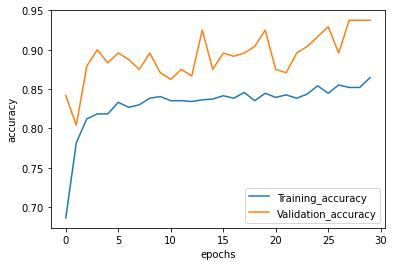

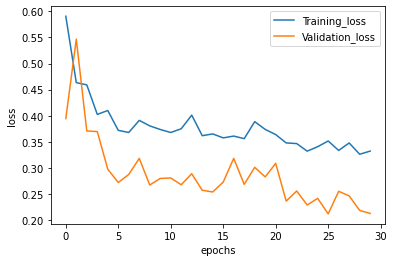

[INFO] Fine turinng...
Epoch 1/30
318/318 [==============================] - 23s 73ms/step - loss: 0.5408 - accuracy: 0.8248 - val_loss: 13.4989 - val_accuracy: 0.1625
Epoch 2/30
318/318 [==============================] - 23s 71ms/step - loss: 0.5217 - accuracy: 0.8353 - val_loss: 2.8346 - val_accuracy: 0.8208
Epoch 3/30
318/318 [==============================] - 23s 72ms/step - loss: 0.4721 - accuracy: 0.8332 - val_loss: 1.3605 - val_accuracy: 0.8375accu - ETA: 0s - loss: 0.4683 - accu
Epoch 4/30
318/318 [==============================] - 23s 71ms/step - loss: 0.4710 - accuracy: 0.8321 - val_loss: 0.7517 - val_accuracy: 0.8375
Epoch 5/30
318/318 [==============================] - 23s 72ms/step - loss: 0.4793 - accuracy: 0.8321 - val_loss: 0.4786 - val_accuracy: 0.8500
Epoch 6/30
318/318 [==============================] - 23s 72ms/step - loss: 0.4558 - accuracy: 0.8321 - val_loss: 13.4989 - val_accuracy: 0.1625
Epoch 7/30
318/318 [==============================] - 23s 72ms/step - loss:

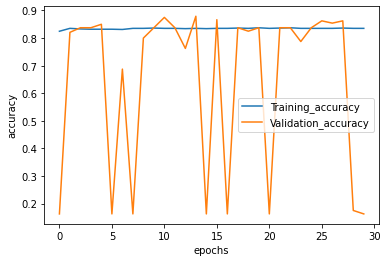

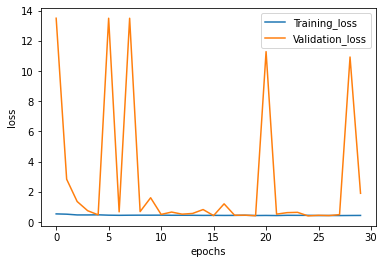

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Vgg\assets


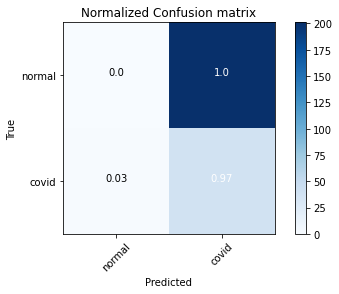

[INFO] compiling model...
[INFO] Pretraining...
Epoch 1/30
318/318 [==============================] - 17s 55ms/step - loss: 0.5767 - accuracy: 0.8048 - val_loss: 0.5338 - val_accuracy: 0.8375
Epoch 2/30
318/318 [==============================] - 16s 51ms/step - loss: 0.4755 - accuracy: 0.8311 - val_loss: 0.4623 - val_accuracy: 0.8375
Epoch 3/30
318/318 [==============================] - 16s 50ms/step - loss: 0.4610 - accuracy: 0.8342 - val_loss: 0.4798 - val_accuracy: 0.8375
Epoch 4/30
318/318 [==============================] - 16s 50ms/step - loss: 0.4627 - accuracy: 0.8353 - val_loss: 0.4594 - val_accuracy: 0.8375
Epoch 5/30
318/318 [==============================] - 16s 50ms/step - loss: 0.4500 - accuracy: 0.8363 - val_loss: 0.4480 - val_accuracy: 0.8375
Epoch 6/30
318/318 [==============================] - 16s 49ms/step - loss: 0.4476 - accuracy: 0.8363 - val_loss: 0.4372 - val_accuracy: 0.8375
Epoch 7/30
318/318 [==============================] - 16s 49ms/step - loss: 0.4516 - acc

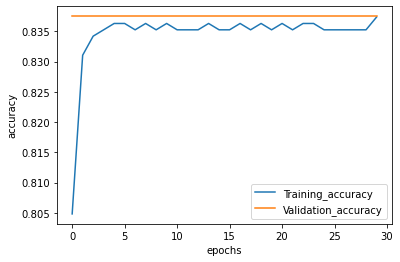

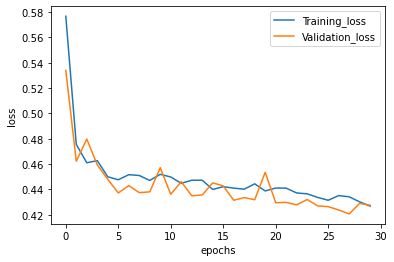

[INFO] Fine turinng...
Epoch 1/30
318/318 [==============================] - 20s 62ms/step - loss: 0.5050 - accuracy: 0.8856 - val_loss: 0.8554 - val_accuracy: 0.8375
Epoch 2/30
318/318 [==============================] - 18s 56ms/step - loss: 0.1887 - accuracy: 0.9370 - val_loss: 0.5001 - val_accuracy: 0.7917
Epoch 3/30
318/318 [==============================] - 18s 58ms/step - loss: 0.0881 - accuracy: 0.9759 - val_loss: 0.2179 - val_accuracy: 0.9000
Epoch 4/30
318/318 [==============================] - 18s 57ms/step - loss: 0.1147 - accuracy: 0.9675 - val_loss: 0.1723 - val_accuracy: 0.9583
Epoch 5/30
318/318 [==============================] - 18s 58ms/step - loss: 0.1279 - accuracy: 0.9570 - val_loss: 0.3419 - val_accuracy: 0.8667
Epoch 6/30
318/318 [==============================] - 19s 58ms/step - loss: 0.0458 - accuracy: 0.9822 - val_loss: 1.2497 - val_accuracy: 0.6875
Epoch 7/30
318/318 [==============================] - 19s 59ms/step - loss: 0.0416 - accuracy: 0.9916 - val_loss:

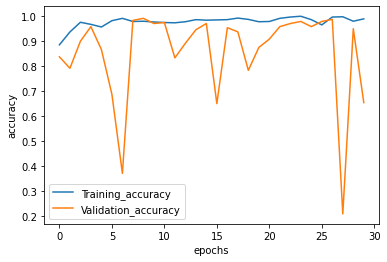

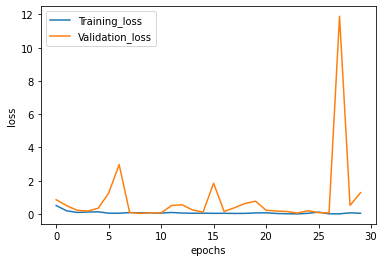

INFO:tensorflow:Assets written to: ResNet50\assets


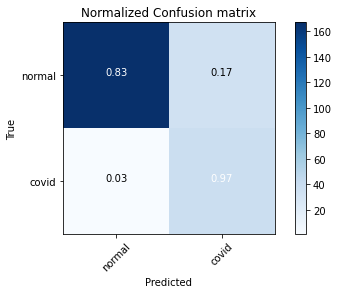

[INFO] compiling model...
[INFO] Pretraining...
Epoch 1/30
318/318 [==============================] - 18s 56ms/step - loss: 0.6261 - accuracy: 0.8321 - val_loss: 0.2597 - val_accuracy: 0.9083
Epoch 2/30
318/318 [==============================] - 15s 48ms/step - loss: 0.3061 - accuracy: 0.8888 - val_loss: 0.2564 - val_accuracy: 0.8917
Epoch 3/30
318/318 [==============================] - 17s 52ms/step - loss: 0.2635 - accuracy: 0.9024 - val_loss: 0.2470 - val_accuracy: 0.9125
Epoch 4/30
318/318 [==============================] - 16s 49ms/step - loss: 0.2422 - accuracy: 0.9161 - val_loss: 0.3984 - val_accuracy: 0.8708
Epoch 5/30
318/318 [==============================] - 16s 49ms/step - loss: 0.2485 - accuracy: 0.9035 - val_loss: 0.2122 - val_accuracy: 0.9167
Epoch 6/30
318/318 [==============================] - 16s 49ms/step - loss: 0.2017 - accuracy: 0.9276 - val_loss: 0.2679 - val_accuracy: 0.8958
Epoch 7/30
318/318 [==============================] - 16s 49ms/step - loss: 0.2017 - acc

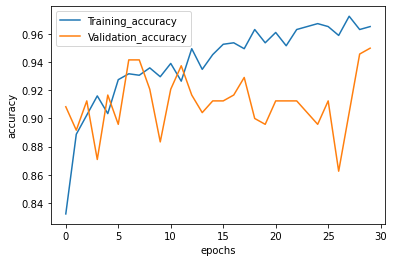

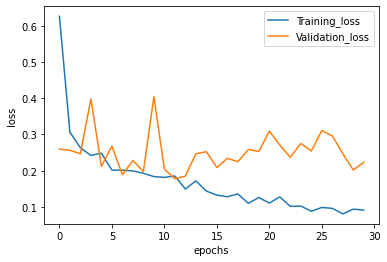

[INFO] Fine turinng...
Epoch 1/30
318/318 [==============================] - 19s 59ms/step - loss: 0.6571 - accuracy: 0.8321 - val_loss: 0.3434 - val_accuracy: 0.9167
Epoch 2/30
318/318 [==============================] - 18s 56ms/step - loss: 0.2506 - accuracy: 0.9108 - val_loss: 0.2815 - val_accuracy: 0.8958
Epoch 3/30
318/318 [==============================] - 17s 52ms/step - loss: 0.1420 - accuracy: 0.9507 - val_loss: 0.1380 - val_accuracy: 0.9500
Epoch 4/30
318/318 [==============================] - 17s 53ms/step - loss: 0.1251 - accuracy: 0.9601 - val_loss: 0.1554 - val_accuracy: 0.9625
Epoch 5/30
318/318 [==============================] - 17s 53ms/step - loss: 0.1477 - accuracy: 0.9454 - val_loss: 0.1553 - val_accuracy: 0.9292
Epoch 6/30
318/318 [==============================] - 17s 53ms/step - loss: 0.1358 - accuracy: 0.9601 - val_loss: 0.1370 - val_accuracy: 0.9625
Epoch 7/30
318/318 [==============================] - 17s 54ms/step - loss: 0.0978 - accuracy: 0.9580 - val_loss:

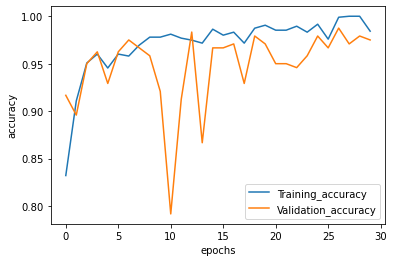

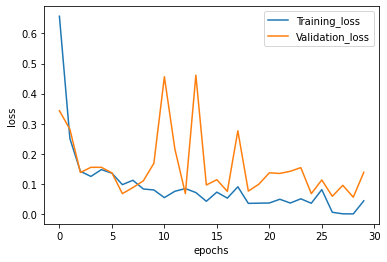

INFO:tensorflow:Assets written to: Inception\assets


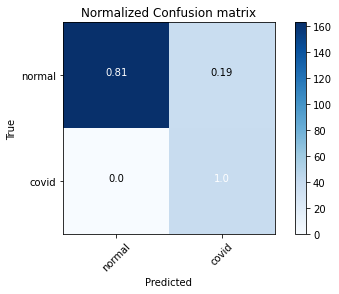

TypeError: cannot unpack non-iterable NoneType object

In [6]:
# split data into training data testing set, convert target label to one-Hot encoding
def get_data(class_num):
    if class_num == 2:
        label_dict = {'covid':1,'normal':0,'pneumonia':0}
        label_list = ['normal','covid']
    elif class_num == 3:
        label_dict = {'covid':1,'normal':0,'pneumonia':2}
        label_list = ['normal','covid', 'pneumonia']
    label_transformed = np.vectorize(label_dict.get)(labels)
    (trainX, testX, trainY, testY) = train_test_split(data, label_transformed, test_size=0.2, stratify = label_transformed, random_state=42)
    trainY = to_categorical(trainY, num_classes = class_num)
    testY = to_categorical(testY, num_classes = class_num)
    trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")
    return trainX, trainY, testX, testY, trainAug, label_list
    
# bulid base model, each model has slightly different structure for the top layers.
def define_model(model_type, class_num):
    if model_type == 'ResNet50':
        baseModel = ResNet50(weights='imagenet',include_top=False, input_tensor=Input(shape=(224, 224, 3)), classes = class_num)
        headModel = baseModel.output
        headModel = GlobalAveragePooling2D()(headModel)
        headModel = Dense(1024, activation='relu')(headModel)
        predictions = Dense(class_num, activation='softmax')(headModel)
        model = Model(baseModel.input, predictions)

        return baseModel, model
        
    elif model_type == 'Vgg':
        baseModel = VGG19(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)), classes = class_num)
        headModel = baseModel.output
        headModel = x= GlobalMaxPool2D()(headModel)
        headModel = Dense(512, activation="relu")(headModel)
        headModel= BatchNormalization()(headModel)
        headModel = Dropout(0.6)(headModel)
        headModel = Dense(128, activation="relu")(headModel)
        headModel= BatchNormalization()(headModel)
        headModel = Dropout(0.4)(headModel)
        headModel = Dense(64, activation="relu")(headModel)
        headModel= BatchNormalization()(headModel)
        headModel = Dropout(0.3)(headModel)
        headModel = Dense(class_num, activation="sigmoid")(headModel)
        model = Model(inputs=baseModel.input, outputs=headModel)

        return baseModel, model
    elif model_type == 'DenseNet':
        baseModel=DenseNet121(include_top=False, weights='imagenet',input_tensor=Input(shape=(224, 224, 3)),input_shape=None,pooling=None,classes = class_num)
        x=baseModel.output
        x= GlobalAveragePooling2D()(x)
        x= BatchNormalization()(x)
        x= Dropout(0.5)(x)
        x= Dense(1024,activation='relu')(x) 
        x= Dense(512,activation='relu')(x) 
        x= BatchNormalization()(x)
        x= Dropout(0.5)(x)
        preds=Dense(class_num,activation='softmax')(x) 
        model=Model(inputs=baseModel.input,outputs=preds)
        return baseModel, model
        
    elif model_type == 'Inception':
        baseModel = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(224, 224, 3)),input_shape=None,pooling=None, classes = class_num)
        headModel = baseModel.output
        headModel = GlobalAveragePooling2D()(headModel)
        headModel = Dense(1024, activation='relu')(headModel)
        predictions = Dense(class_num, activation='softmax')(headModel)
        model = Model(baseModel.input, predictions)
        return baseModel, model
# plot the accuracy and loss for each epoch
def acc_loss_plot(H, model_type, class_num, addPhrase):
# plot the training loss and accuracy
    accs = H.history['accuracy']
    val_accs = H.history['val_accuracy']
    
    plt.plot(range(len(accs)),accs, label = 'Training_accuracy')
    plt.plot(range(len(accs)),val_accs, label = 'Validation_accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()
    
    loss = H.history['loss']
    val_loss = H.history['val_loss']

    plt.plot(range(len(accs)),loss, label = 'Training_loss')
    plt.plot(range(len(accs)),val_loss, label = 'Validation_loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()        

# train the model
def train_model(model, baseModel, model_type, trainX, trainY, testX, testY, trainAug, class_num):
    start_time = time.time()
    print("[INFO] compiling model...")
    
    # pre learning train
    EPOCHS = 30
    opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
    baseModel.trainable = False
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    
    print("[INFO] Pretraining...")
    H = model.fit_generator(
        trainAug.flow(trainX, trainY, batch_size=BS),
        steps_per_epoch=len(trainX) // BS,
        validation_data=trainAug.flow(testX, testY, batch_size=BS),
        validation_steps=len(testX) // BS,
        epochs=EPOCHS)
    acc_loss_plot(H, model_type, class_num,'pretrained')
    
    # transfer learning
    EPOCHS = 30
    baseModel.trainable = True
    opt = Adam(lr=INIT_LR/10, decay=INIT_LR / (EPOCHS * 100))
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    print("[INFO] Fine turinng...")
    H = model.fit_generator(
        trainAug.flow(trainX, trainY, batch_size=BS),
        steps_per_epoch=len(trainX) // BS,
        validation_data=trainAug.flow(testX, testY, batch_size=BS),
        validation_steps=len(testX) // BS,
        epochs=EPOCHS)
    acc_loss_plot(H, model_type, class_num, 'fine-tuning')
    
    return model, H


# plot the confusion matrix on test data with final trained model
def plot_confusion_matrix(model_type, class_num, cm, classes, title='Normalized Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, float("{:.2f}".format(cm[i, j])),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()

# train model and predict on testing data    
def model_predict(model_type, class_num):
    trainX, trainY, testX, testY, trainAug, label_list = get_data(class_num)
    baseModel, model = define_model(model_type, class_num)
    model_final, H_final = train_model(model, baseModel, model_type, trainX, trainY, testX, testY, trainAug, class_num)
    model_final.save(model_type)
    predictY = model_final.predict(testX)
    y_true = []
    for y in testY:
        y_true.append(list(y).index(max(y)))
    y_pred = []
    for y in predictY:
        y_pred.append(list(y).index(max(y)))
    cnf_matrix = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(model_type, class_num, cnf_matrix, classes = label_list)
    
for class_num in [2, 3]:
    for model_type in ['Vgg','ResNet50','Inception','DensNet']:
        model_predict(model_type, class_num)    
    

[INFO] compiling model...
[INFO] Pretraining...
Epoch 1/30
318/318 [==============================] - 18s 55ms/step - loss: 0.7768 - accuracy: 0.8237 - val_loss: 0.4554 - val_accuracy: 0.8542
Epoch 2/30
318/318 [==============================] - 16s 51ms/step - loss: 0.3049 - accuracy: 0.8667 - val_loss: 0.2200 - val_accuracy: 0.9125
Epoch 3/30
318/318 [==============================] - 16s 50ms/step - loss: 0.2457 - accuracy: 0.9045 - val_loss: 0.2733 - val_accuracy: 0.8917
Epoch 4/30
318/318 [==============================] - 16s 51ms/step - loss: 0.2369 - accuracy: 0.9119 - val_loss: 0.3408 - val_accuracy: 0.8792
Epoch 5/30
318/318 [==============================] - 16s 51ms/step - loss: 0.2338 - accuracy: 0.9129 - val_loss: 0.2463 - val_accuracy: 0.9042
Epoch 6/30
318/318 [==============================] - 16s 51ms/step - loss: 0.2021 - accuracy: 0.9307 - val_loss: 0.2965 - val_accuracy: 0.9125
Epoch 7/30
318/318 [==============================] - 16s 51ms/step - loss: 0.2150 - acc

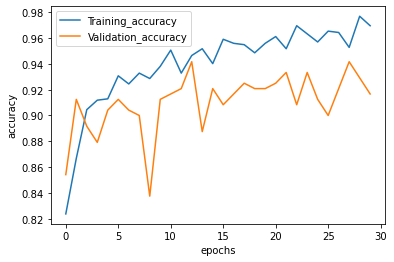

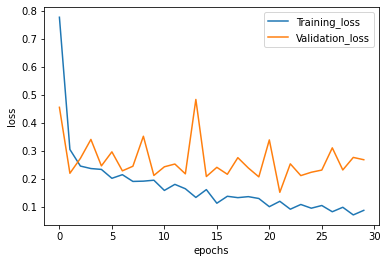

[INFO] Fine turinng...
Epoch 1/30
318/318 [==============================] - 19s 60ms/step - loss: 0.6557 - accuracy: 0.8290 - val_loss: 0.2193 - val_accuracy: 0.9375
Epoch 2/30
318/318 [==============================] - 17s 55ms/step - loss: 0.2319 - accuracy: 0.9297 - val_loss: 0.5844 - val_accuracy: 0.7917
Epoch 3/30
318/318 [==============================] - 17s 55ms/step - loss: 0.1687 - accuracy: 0.9318 - val_loss: 0.1602 - val_accuracy: 0.9500
Epoch 4/30
318/318 [==============================] - 17s 55ms/step - loss: 0.1645 - accuracy: 0.9433 - val_loss: 0.1534 - val_accuracy: 0.9583
Epoch 5/30
318/318 [==============================] - 17s 53ms/step - loss: 0.1667 - accuracy: 0.9486 - val_loss: 0.4038 - val_accuracy: 0.8708
Epoch 6/30
318/318 [==============================] - 17s 54ms/step - loss: 0.1321 - accuracy: 0.9507 - val_loss: 0.1284 - val_accuracy: 0.9667
Epoch 7/30
318/318 [==============================] - 17s 54ms/step - loss: 0.1066 - accuracy: 0.9643 - val_loss:

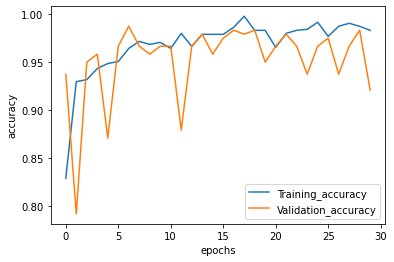

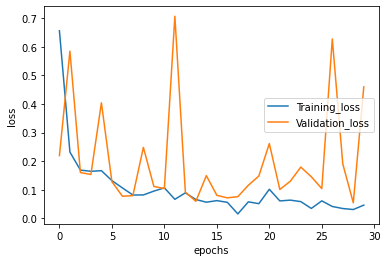

INFO:tensorflow:Assets written to: Inception\assets


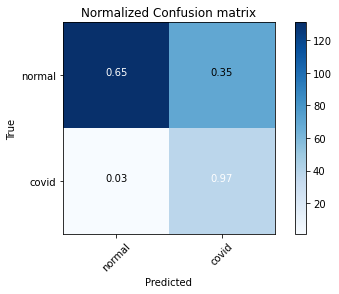

In [7]:
model_predict('Inception', 2) 
plt.show()